# Notebook 2 : traffic_prediction.ipynb

## Prédiction du niveau de trafic (Faible / Moyenne / Forte)

1. Imports  
2. Chargement des données  
3. Nettoyage  
4. Création de la variable cible (TRAFFIC_LEVEL)  
5. Sélection des features  
6. Split  
7. Modèle Random Forest  
&nbsp;&nbsp;&nbsp;7.1. Évaluation  
&nbsp;&nbsp;&nbsp;7.2. Prédiction 
8. Logistic Regression  
9. XGBoost  
&nbsp;&nbsp;&nbsp;9.1. Matrice de confusion 
10. Comparaison visuelle

### 1. Imports

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

### 2. Chargement des données

In [22]:
df = pd.read_csv("../data/tracker.csv")
df.head()

,TIME,REGION_ID,SPEED,REGION,Unnamed: 4,NUM_READS,HOUR,DAY_OF_WEEK,MONTH,DESCRIPTION,RECORD_ID,WEST,EAST,SOUTH,NORTH,NW_LOCATION,SE_LOCATION
0,3/31/2018 14:40,2,27.95,Far North West,25,493,14,7,3,North of Montrose. East River to Cicero,02-201803311940,-87.846210,-87.747456,41.960669,42.019100,POINT (-87.84621 42.0190998),POINT (-87.747456 41.960669)
1,3/31/2018 14:40,3,19.09,North Park-Albany-Linconl Sq,48,834,14,7,3,Montrose to Devon. Cicero to Ravenswood,03-201803311940,-87.747456,-87.674590,41.960669,41.997946,POINT (-87.747456 41.997946),POINT (-87.67459 41.960669)
2,3/31/2018 14:40,4,18.41,Edge Water-Uptown,36,585,14,7,3,Montrose to Devon. Ravenswood to Lake Shore,04-201803311940,-87.674590,-87.646438,41.960669,41.997946,POINT (-87.67459 41.997946),POINT (-87.646438 41.960669)
3,3/31/2018 14:40,6,20.45,Irving Park-Avondale-North Ctr,48,811,14,7,3,Diversey to Montrose. Cicero to Ravenswood,06-201803311940,-87.747456,-87.674590,41.931841,41.960669,POINT (-87.747456 41.960669),POINT (-87.67459 41.931841)
4,3/31/2018 14:40,7,18.41,Hermosa-Logan Square,47,817,14,7,3,North Ave to Diversy. Cicero to Ravenswood,07-201803311940,-87.747456,-87.674590,41.909269,41.931841,POINT (-87.747456 41.931841),POINT (-87.67459 41.909269)


### 3. Nettoyage

In [23]:
df["NUM_READS"] = df["NUM_READS"].astype(str).str.replace(",", "").astype(float)
df = df.dropna()

### 4. Création de la variable cible (TRAFFIC_LEVEL)

In [24]:
def traffic_level(speed):
    if speed < 15:
        return "Forte"
    elif speed < 25:
        return "Moyenne"
    else:
        return "Faible"

df["TRAFFIC_LEVEL"] = df["SPEED"].apply(traffic_level)

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes :", label_encoder.classes_)

Classes : ['Faible' 'Forte' 'Moyenne']


### 5. Sélection des features

In [26]:
features = [
    "HOUR",
    "DAY_OF_WEEK",
    "MONTH",
    "NUM_READS",
    "REGION_ID",
    "WEST",
    "EAST",
    "NORTH",
    "SOUTH"
]

X = df[features]
y = df["TRAFFIC_LEVEL"]


### 6. Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### 7. Modèle Random Forest

In [28]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


7.1. Évaluation

              precision    recall  f1-score   support

      Faible       0.85      0.88      0.87     76981
       Forte       0.91      0.86      0.88     20363
     Moyenne       0.91      0.89      0.90    102656

    accuracy                           0.89    200000
   macro avg       0.89      0.88      0.88    200000
weighted avg       0.89      0.89      0.89    200000



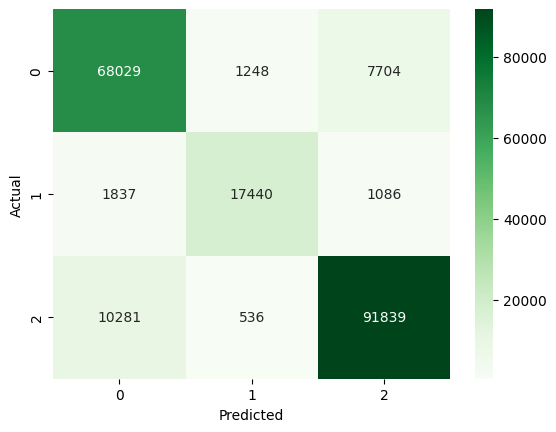

In [29]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


7.2. Prédiction

In [30]:
model.predict(X.iloc[[0]])


array(['Faible'], dtype=object)

### 8. Logistic Regression

In [31]:
log_reg = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)

print("===== Logistic Regression =====")
print(classification_report(y_test, y_pred_logreg))

c:\Users\ISMAIL\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


===== Logistic Regression =====
              precision    recall  f1-score   support

      Faible       0.68      0.72      0.70     76981
       Forte       0.48      0.05      0.10     20363
     Moyenne       0.77      0.87      0.82    102656

    accuracy                           0.73    200000
   macro avg       0.64      0.55      0.54    200000
weighted avg       0.71      0.73      0.70    200000



### 9. XGBoost

In [32]:
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [33]:
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train, y_train_enc)

y_pred_xgb_enc = xgb_model.predict(X_test)

# Décodage vers labels texte
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_enc)
y_test_decoded = label_encoder.inverse_transform(y_test_enc)

print("===== XGBoost =====")
print(classification_report(y_test_decoded, y_pred_xgb))


===== XGBoost =====
              precision    recall  f1-score   support

      Faible       0.86      0.88      0.87     76981
       Forte       0.90      0.88      0.89     20363
     Moyenne       0.92      0.90      0.91    102656

    accuracy                           0.89    200000
   macro avg       0.89      0.89      0.89    200000
weighted avg       0.89      0.89      0.89    200000



9.1. Matrice de confusion

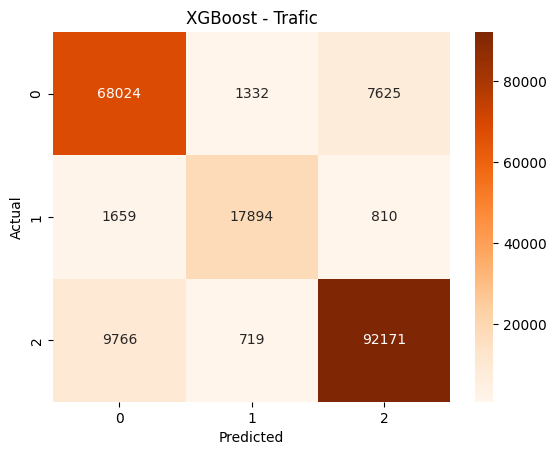

In [34]:
cm = confusion_matrix(y_test_decoded, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost - Trafic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 10. Comparaison


Random Forest


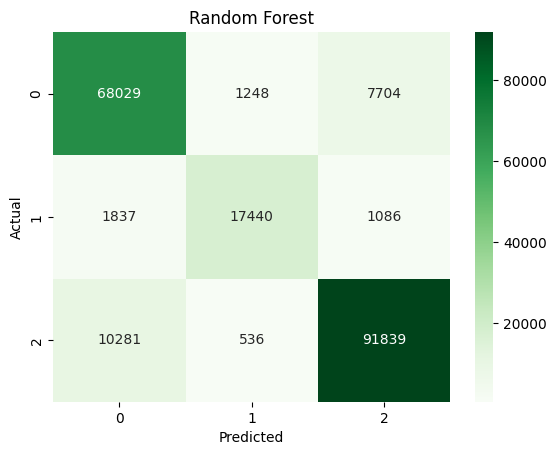


Logistic Regression


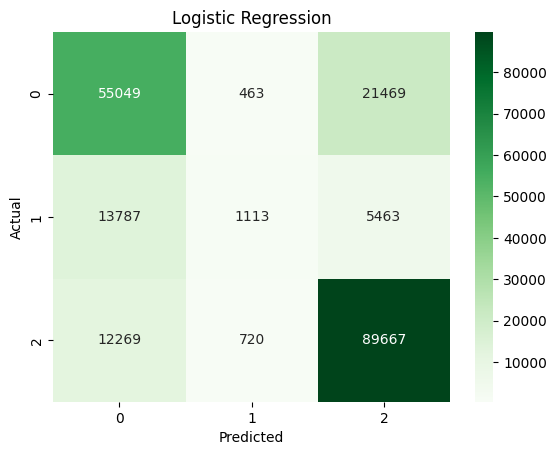


XGBoost


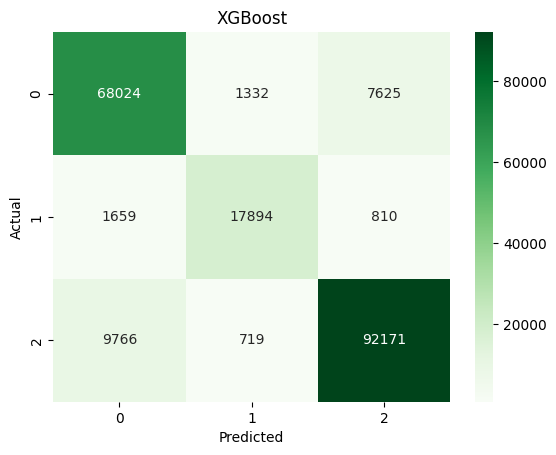

In [35]:
models = {
    "Random Forest": model.predict(X_test),
    "Logistic Regression": y_pred_logreg,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    print(f"\n{name}")
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()